# Кусовая работа студента группы 1365
## Тараданова Николая

### Импорт библиотек, файлов и настройка вывода


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams.update({'font.size': 14})

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH_TO_TRAIN = 'data/train.csv'
PATH_TO_TEST = 'data/test.csv'

In [3]:
train_df = pd.read_csv(PATH_TO_TRAIN)

X = train_df.drop(['Price'], axis=1)
y = train_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

test_df = pd.read_csv(PATH_TO_TEST)

### Используемые функции


In [4]:
def add_columns(dataframe, column_name):
    df = pd.get_dummies(dataframe[column_name])
    for name in df.columns:
        df.rename(columns={name : column_name + '_' + name}, inplace=True)
    dataframe[df.columns] = df
    dataframe.drop([column_name], axis=1, inplace=True)

In [5]:

def display_components_in_cool_3D_space(components, y_train, component1, component2, component3, label='Price'):
    components_with_labels_df = pd.concat([components, y_train], axis=1)
    fig = go.Figure(data=[go.Scatter3d(
        x=components_with_labels_df[component1],
        y=components_with_labels_df[component2],
        z=components_with_labels_df[component3],
        mode='markers',
        marker=dict(
            size=5,
            color=components_with_labels_df[label],
            colorscale='jet',
            colorbar=dict(thickness=10),
            line=dict(width=2, color='DarkSlateGrey')
        )
    )])

    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=0),
        scene=dict(
            xaxis_title=component1,
            yaxis_title=component2,
            zaxis_title=component3),
    )

    fig.show()

In [6]:
def apply_elbow_method(X):
    distortions = []
    K = range(2,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
        distortions.append(sum(np.min(cdist(X,
                                            kmeanModel.cluster_centers_,
                                            'euclidean'),
                                      axis=1)) / X.shape[0])

    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k');

In [7]:
def reduce_dims_to_2D_space_with_PCA(df):
    pca = PCA(n_components=2)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])

def reduce_dims_to_3D_space_with_PCA(df):
    pca = PCA(n_components=3)
    components = pca.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])

def reduce_dims_to_2D_space_with_TSNE(df):
    tsne = TSNE(n_components=2, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2'])

def reduce_dims_to_3D_space_with_TSNE(df):
    tsne = TSNE(n_components=3, random_state=42)
    components = tsne.fit_transform(df)
    return pd.DataFrame(data = components, columns = ['component_1', 'component_2', 'component_3'])

def display_components_in_3D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    if labels is not None:
        if labels.nunique() > 10:
            p = ax.scatter(components_with_labels_df['component_1'],
                           components_with_labels_df['component_2'],
                           components_with_labels_df['component_3'],
                           c=labels, cmap=plt.get_cmap('jet'), alpha=0.5)
        else:
            p = ax.scatter(components_with_labels_df['component_1'],
                           components_with_labels_df['component_2'],
                           components_with_labels_df['component_3'],
                           c=labels, cmap=plt.get_cmap('jet', labels.nunique()), alpha=0.5)
    else:
        p = ax.scatter(components_with_labels_df['component_1'],
                       components_with_labels_df['component_2'],
                       components_with_labels_df['component_3'],
                       alpha=0.5)

    ax.set_xlabel('component_1')
    ax.set_ylabel('component_2')
    ax.set_zlabel('component_3')
    ax.set_title('3D mapping of objects')
    fig.colorbar(p);

def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, labels], axis=1)

    if labels is not None:
        if labels.nunique() > 10:
            p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                               c=labels.name, cmap=plt.get_cmap('jet'),
                                               alpha=0.5, figsize=(12, 6), sharex=False)
        else:
            p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                               c=labels.name, cmap=plt.get_cmap('jet', labels.nunique()),
                                               alpha=0.5, figsize=(12, 6), sharex=False)
    else:
        p = components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                           alpha=0.5, figsize=(12, 6))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects');

def display_clusters_distribution(unique_labels, labels_counts):

    plt.figure(figsize=(8,5))

    plt.bar(unique, counts)

    plt.xlabel('Clusters')
    plt.xticks(unique)
    plt.ylabel('Count')
    plt.title('Clusters distribution');

# Первый взгляд

In [8]:
X_train.head(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
4901  13295           1    1.0  39.248800         NaN            0.0      9   
4375   3756          61    2.0  56.053580   33.929772            8.0      8   
6698  15429          13    1.0  41.009788   23.960289            8.0      3   
9805   7238           9    2.0  63.640480   58.149243            1.0      3   
1101  13604          90    1.0  49.327912   20.992250           12.0     15   
9537   2253           1    3.0  89.397275   85.959266            1.0      9   
7655   7846          79    2.0  42.090330   27.413836            5.0      2   
5235   1694          29    2.0  59.031566   36.372927           10.0     20   
5165   7897         109    2.0  44.514341   28.068914            5.0      8   
118   14822          18    3.0  76.235137   47.001817           10.0      9   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
4901        17.0       1977   0.007122         B         B         1   
4375        12.0       1986   0.300323         B         B        52   
6698        14.0       1997   0.090799         B         B        74   
9805         1.0       1977   0.161532         B         B        25   
1101        23.0       2008   0.246032         B         A        22   
9537        22.0       1977   0.007122         B         B         1   
7655         5.0       1964   0.169091         B         B        19   
5235        22.0       2002   0.069660         B         B        31   
5165         9.0       1965   0.000000         B         B        25   
118         17.0       1997   0.000000         B         B        30   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
4901       264         0           NaN            0        1       B  
4375     10311         6           NaN            1        9       B  
6698     19083         2           NaN            5       15       B  
9805      5648         1          30.0            2        4       B  
1101      3151         4        2715.0            3        3       B  
9537       264         0           NaN            0        1       B  
7655      3856        10           NaN            2        5       B  
5235      6119         4           NaN            1        2       B  
5165      5027         4          46.0            1        1       B  
118       5562         0           NaN            0        5       A

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 4901 to 7270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             7500 non-null   int64  
 1   DistrictId     7500 non-null   int64  
 2   Rooms          7500 non-null   float64
 3   Square         7500 non-null   float64
 4   LifeSquare     5906 non-null   float64
 5   KitchenSquare  7500 non-null   float64
 6   Floor          7500 non-null   int64  
 7   HouseFloor     7500 non-null   float64
 8   HouseYear      7500 non-null   int64  
 9   Ecology_1      7500 non-null   float64
 10  Ecology_2      7500 non-null   object 
 11  Ecology_3      7500 non-null   object 
 12  Social_1       7500 non-null   int64  
 13  Social_2       7500 non-null   int64  
 14  Social_3       7500 non-null   int64  
 15  Healthcare_1   3886 non-null   float64
 16  Helthcare_2    7500 non-null   int64  
 17  Shops_1        7500 non-null   int64  
 18  Shops

In [10]:
X_train.describe().T

count         mean            std          min          25%  \
Id             7500.0  8368.529067    4858.185603     0.000000  4165.750000   
DistrictId     7500.0    50.441733      43.700617     0.000000    19.000000   
Rooms          7500.0     1.887600       0.840234     0.000000     1.000000   
Square         7500.0    56.262165      20.337193     2.377248    41.748189   
LifeSquare     5906.0    37.438158      98.726068     0.370619    22.838608   
KitchenSquare  7500.0     6.417333      32.870226     0.000000     1.000000   
Floor          7500.0     8.502800       5.236619     1.000000     4.000000   
HouseFloor     7500.0    12.634400       6.833644     0.000000     9.000000   
HouseYear      7500.0  4658.735867  231517.756849  1912.000000  1974.000000   
Ecology_1      7500.0     0.117437       0.118195     0.000000     0.017647   
Social_1       7500.0    24.736133      17.627507     0.000000     6.000000   
Social_2       7500.0  5361.467467    4021.616228   168.000000  1564.000000   
Social_3       7500.0     8.027733      23.825236     0.000000     0.000000   
Healthcare_1   3886.0  1129.527535    1015.975294     0.000000   325.000000   
Helthcare_2    7500.0     1.309467       1.488576     0.000000     0.000000   
Shops_1        7500.0     4.259200       4.819673     0.000000     1.000000   

                       50%           75%           max  
Id             8378.500000  12540.250000  1.679600e+04  
DistrictId       35.000000     75.000000  2.090000e+02  
Rooms             2.000000      2.000000  1.900000e+01  
Square           52.539538     65.980391  6.047060e+02  
LifeSquare       32.837997     45.069982  7.480592e+03  
KitchenSquare     6.000000      9.000000  2.014000e+03  
Floor             7.000000     12.000000  4.200000e+01  
HouseFloor       14.000000     17.000000  1.170000e+02  
HouseYear      1977.000000   2001.000000  2.005201e+07  
Ecology_1         0.072158      0.194489  5.218671e-01  
Social_1         25.000000     36.000000  7.400000e+01  
Social_2       5285.000000   7287.000000  1.908300e+04  
Social_3          2.000000      5.000000  1.410000e+02  
Healthcare_1    900.000000   1547.750000  4.849000e+03  
Helthcare_2       1.000000      2.000000  6.000000e+00  
Shops_1           3.000000      6.000000  2.300000e+01

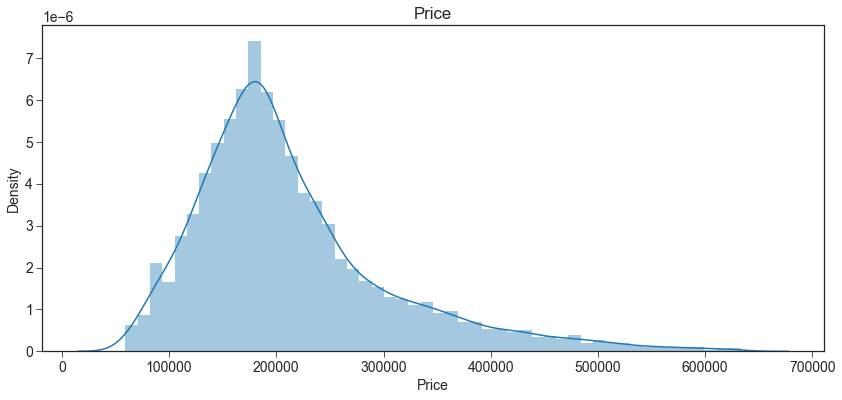

In [11]:
plt.figure(figsize = (14, 6))

sns.distplot(train_df['Price'])
plt.title('Price');

### Фича 'Healthcare' заполнена на 52%, принимаю решение исключить её из набора

In [12]:
X_train.drop(['Healthcare_1'], axis=1, inplace=True)
X_test.drop(['Healthcare_1'], axis=1, inplace=True)
test_df.drop(['Healthcare_1'], axis=1, inplace=True)

### Выбираю все фичи 'object'

In [13]:
feature_object_names = X_train.select_dtypes(include='object').columns.tolist()
feature_object_names

['Ecology_2', 'Ecology_3', 'Shops_2']

In [14]:
X_train['Ecology_2'].value_counts()

B    7430
A      70
Name: Ecology_2, dtype: int64

In [15]:
X_train['Ecology_3'].value_counts()

B    7289
A     211
Name: Ecology_3, dtype: int64

In [16]:
X_train['Shops_2'].value_counts()

B    6877
A     623
Name: Shops_2, dtype: int64

In [17]:
X_train.loc[X_train['LifeSquare'].isna(), 'LifeSquare'] = X_train['Square'] - X_train['KitchenSquare']
X_test.loc[X_test['LifeSquare'].isna(),   'LifeSquare'] = X_test['Square']  - X_test['KitchenSquare']
test_df.loc[test_df['LifeSquare'].isna(), 'LifeSquare'] = test_df['Square'] - test_df['KitchenSquare']

### Преобразую признаки 'Ecology_2', 'Ecology_3', 'Shops_2' в бинарные

In [18]:
add_columns(X_train, 'Ecology_2')
add_columns(X_train, 'Ecology_3')
add_columns(X_train, 'Shops_2')

add_columns(X_test, 'Ecology_2')
add_columns(X_test, 'Ecology_3')
add_columns(X_test, 'Shops_2')

add_columns(test_df, 'Ecology_2')
add_columns(test_df, 'Ecology_3')
add_columns(test_df, 'Shops_2')


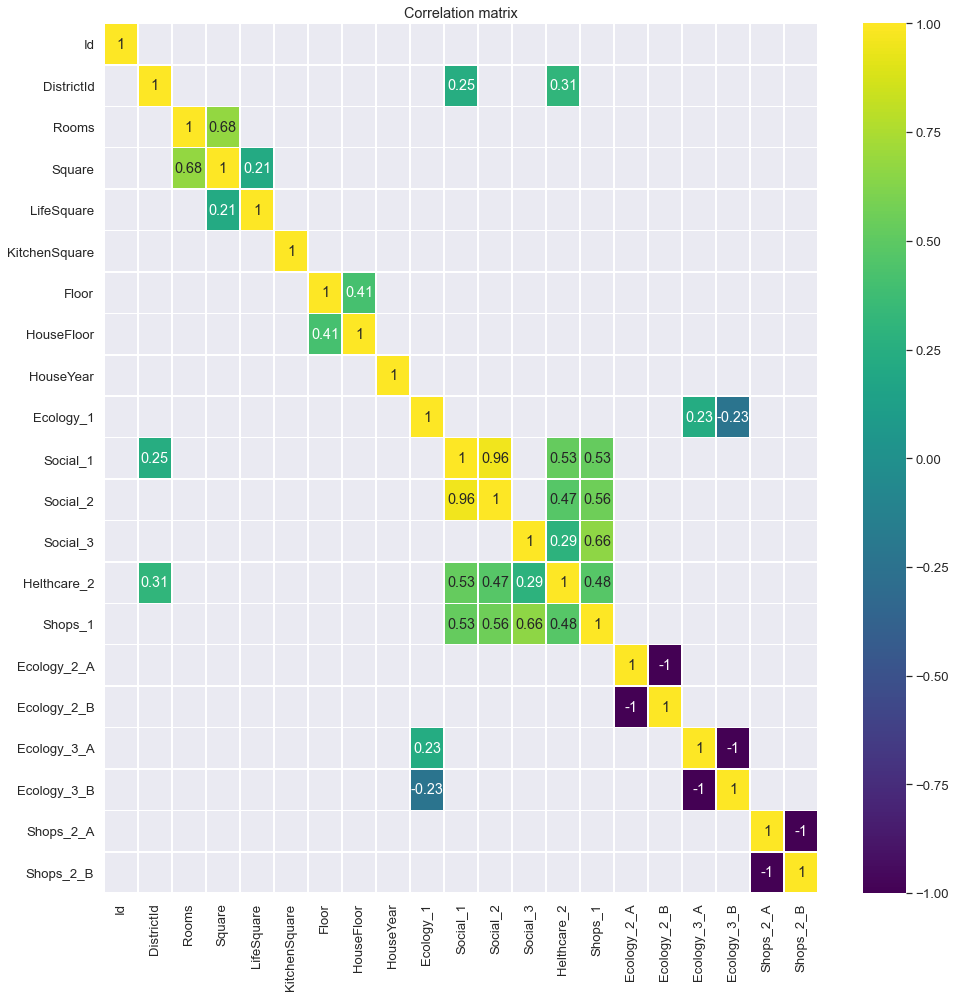

In [19]:
plt.figure(figsize = (16,16))
sns.set(font_scale=1.2)

corr_matrix = X_train.corr()
sns.heatmap(corr_matrix[abs(corr_matrix) >= 0.2], annot=True, linewidths=.5, cmap='viridis')

plt.title('Correlation matrix');

### Посмотрю на числовые фичи

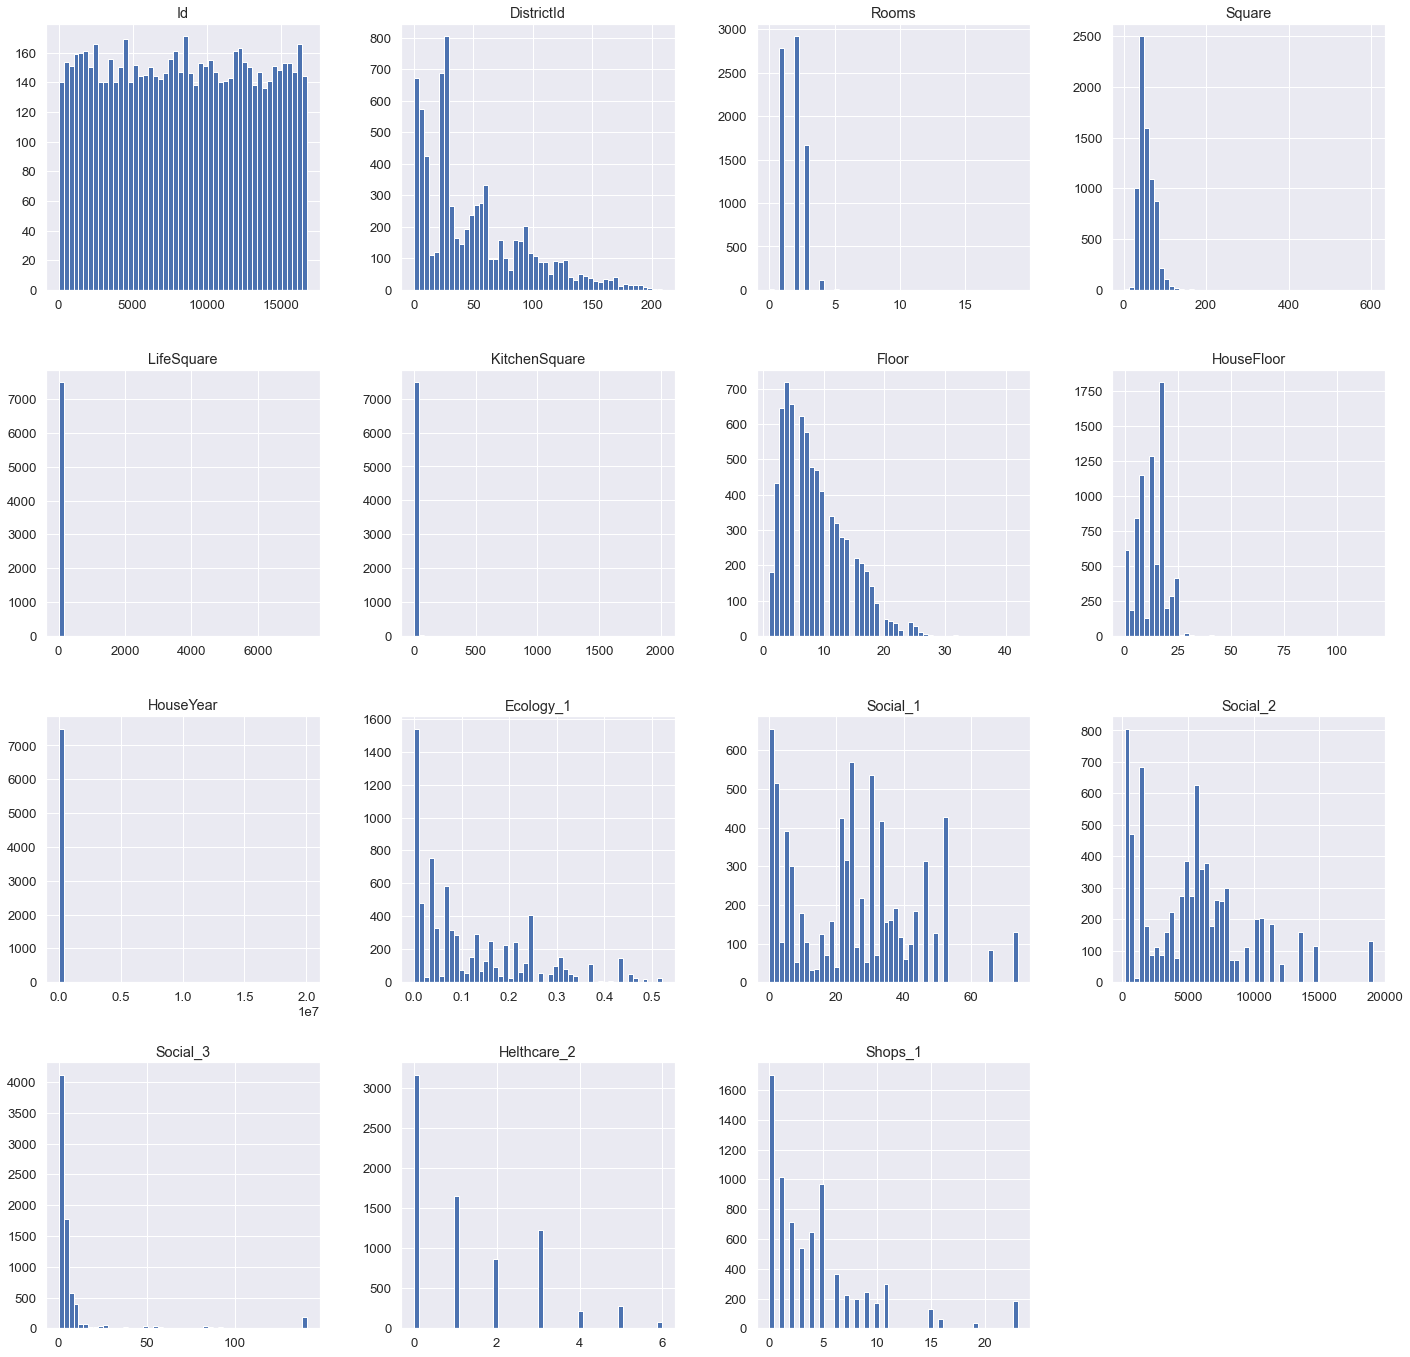

In [20]:
features = X_train.select_dtypes(include=['float64','int64']).columns.tolist()
X_train[features].hist(figsize=(24,24), bins=50, grid=True);

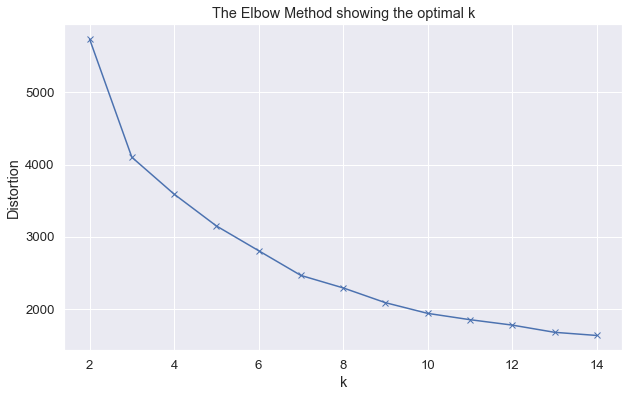

In [21]:
apply_elbow_method(X_train)

In [22]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns=X_test.columns,
                             index=X_test.index)
features = X_train_scaled.iloc[:, :]

In [23]:
components_2d_pca = reduce_dims_to_2D_space_with_PCA(features)
components_2d_tsne = reduce_dims_to_2D_space_with_TSNE(features)

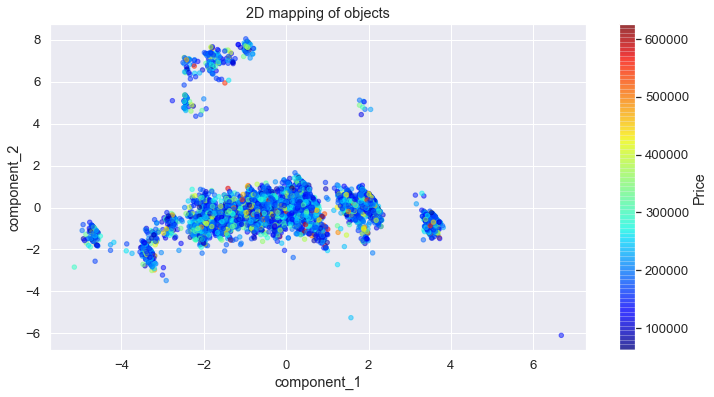

In [24]:
display_components_in_2D_space(components_2d_pca, y_train)

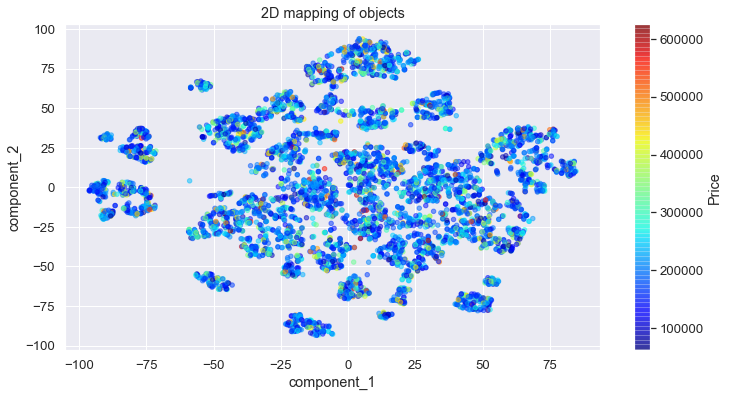

In [25]:
display_components_in_2D_space(components_2d_tsne, y_train)

In [26]:
components_3d_pca = reduce_dims_to_3D_space_with_PCA(features)
components_3d_tsne = reduce_dims_to_3D_space_with_TSNE(features)

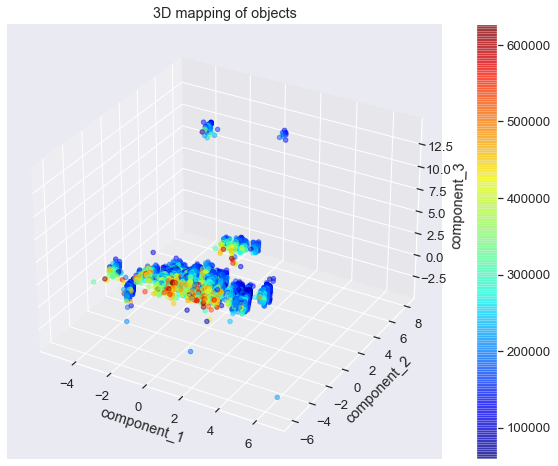

In [27]:
display_components_in_3D_space(components_3d_pca, y_train)

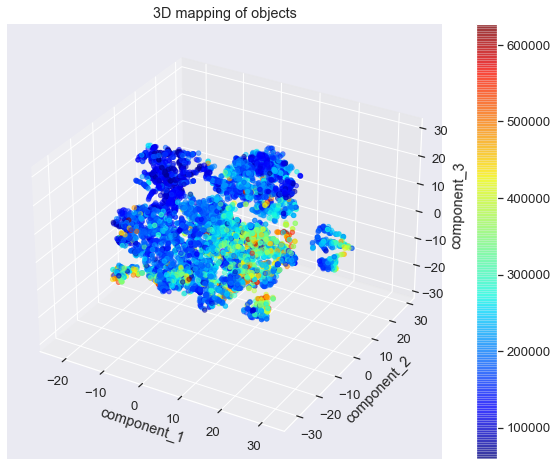

In [28]:
display_components_in_3D_space(components_3d_tsne, y_train)

In [29]:
# Красивое, но в DataSpell не отображается)
display_components_in_cool_3D_space(components_3d_pca, y_train,  'component_1', 'component_2', 'component_3')

In [30]:
display_components_in_cool_3D_space(components_3d_tsne, y_train,  'component_1', 'component_2', 'component_3')

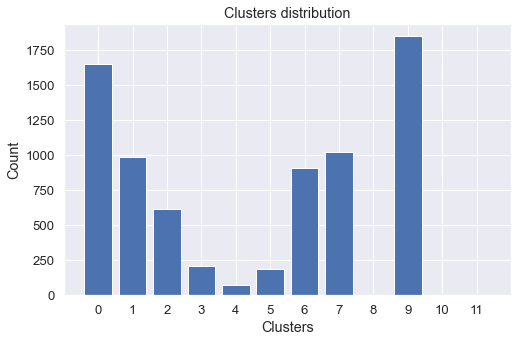

In [37]:
kmeans = KMeans(n_clusters=12, random_state=42)
labels_clast_train = kmeans.fit_predict(features)
labels_clast_train = pd.Series(labels_clast_train, name='clusters')

unique, counts = np.unique(labels_clast_train, return_counts=True)
display_clusters_distribution(unique, counts)

In [40]:
# move_cluster_to_cluster
labels_clast_train.replace(5, 0, inplace=True)
# labels_clast_train.replace(6, 0, inplace=True)
# labels_clast_train.replace(7, 0, inplace=True)
# labels_clast_train.replace(8, 0, inplace=True)
# labels_clast_train.replace(9, 0, inplace=True)
display_components_in_cool_3D_space(components_3d_pca, labels_clast_train, 'component_1', 'component_2', 'component_3', 'clusters')